In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
housing_dataset = pd.read_csv('../dataset/housing.csv')

In [3]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
price_column = housing_dataset.loc[:,["price"]]

In [5]:
#dropping price column 
housing_dataset =housing_dataset.drop(columns='price')

In [6]:
housing_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
housing_dataset["price"] = price_column

In [8]:
housing_dataset.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


##### successfully moved price column to the right of the dataframe

In [9]:
### now checking for null and duplicated values 

In [10]:
housing_dataset.isna().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [11]:
housing_dataset.duplicated().sum()

0

In [12]:
#### so there are not any null or duplicated values ! good ! now, lets get the description of this dataframe but first lets copy ! 

In [13]:
temp_df = housing_dataset.copy()

In [14]:
# getting the info 
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
temp_df.describe(include='all')

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
count,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545,5.450000e+02
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3,NaN
top,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished,NaN
freq,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227,NaN
mean,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.740000e+06


In [16]:
temp_df.sample(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
155,6100,3,2,1,yes,no,yes,no,no,2,yes,furnished,5530000
485,3630,2,1,1,yes,no,no,no,no,0,no,unfurnished,2870000
268,4950,4,1,2,yes,no,no,no,yes,0,no,semi-furnished,4382000
74,4040,3,1,2,yes,no,yes,yes,no,1,no,furnished,6650000
252,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished,4515000
484,3040,2,1,1,no,no,no,no,no,0,no,unfurnished,2870000
52,6000,4,2,4,yes,yes,no,no,yes,1,no,furnished,7350000
527,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished,2275000
199,4200,3,1,2,yes,no,no,no,no,1,no,furnished,4907000
364,3120,3,1,2,no,no,yes,yes,no,0,no,semi-furnished,3703000


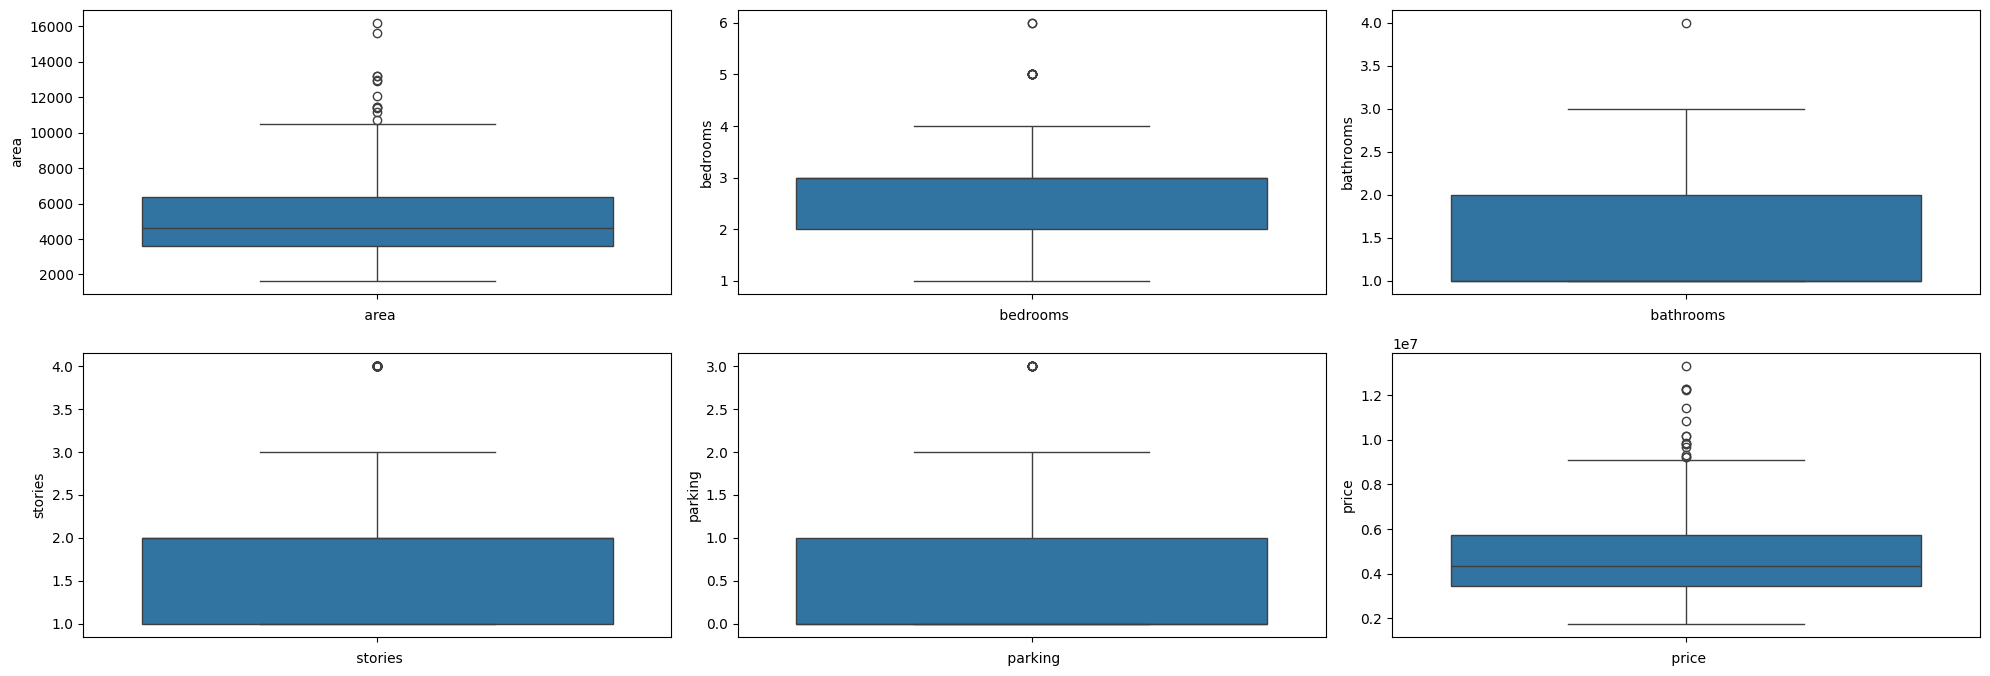

In [17]:
plt.figure(figsize=(20,10))
for i,column in enumerate(temp_df.select_dtypes(['int',float]),1):
    plt.subplot(3,3,i)
    plt.xlabel(f" {column}")
    sns.boxplot(temp_df[column])

plt.tight_layout()
plt.show()

In [18]:
temp_df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [19]:
temp_df["mainroad_encoded"] = temp_df["mainroad"].map({"yes":1,"no":0})

In [20]:
temp_df["guestroom_encoded"] = temp_df["guestroom"].map({"yes":1,"no":0})
temp_df["basement_encoded"] = temp_df["basement"].map({"yes":1,"no":0})
temp_df["hotwaterheating_encoded"] = temp_df["hotwaterheating"].map({"yes":1,"no":0})
temp_df["airconditioning_encoded"] = temp_df["airconditioning"].map({"yes":1,"no":0})
temp_df["prefarea_encoded"] = temp_df["prefarea"].map({"yes":1,"no":0})

In [21]:
temp_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000,1,0,0,0,1,1
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000,1,0,0,0,1,0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000,1,0,1,0,0,1
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000,1,0,1,0,1,1
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000,1,0,1,0,0,0
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150,0,0,0,0,0,0
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000,1,0,0,0,0,0
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000,0,0,0,0,0,0


In [22]:
encoder = LabelEncoder()

In [23]:
temp_df['furnishingstatus_encoded'] = encoder.fit_transform(temp_df["furnishingstatus"])

In [24]:
temp_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000,1,0,0,0,1,1,0
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000,1,0,0,0,1,0,0
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000,1,0,1,0,0,1,1
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000,1,0,1,0,1,1,0
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1820000,1,0,1,0,0,0,2
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,1767150,0,0,0,0,0,0,1
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1750000,1,0,0,0,0,0,2
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,1750000,0,0,0,0,0,0,0


In [25]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   area                      545 non-null    int64 
 1   bedrooms                  545 non-null    int64 
 2   bathrooms                 545 non-null    int64 
 3   stories                   545 non-null    int64 
 4   mainroad                  545 non-null    object
 5   guestroom                 545 non-null    object
 6   basement                  545 non-null    object
 7   hotwaterheating           545 non-null    object
 8   airconditioning           545 non-null    object
 9   parking                   545 non-null    int64 
 10  prefarea                  545 non-null    object
 11  furnishingstatus          545 non-null    object
 12  price                     545 non-null    int64 
 13  mainroad_encoded          545 non-null    int64 
 14  guestroom_encoded         

In [26]:
temp_df = temp_df.drop(columns=temp_df.select_dtypes("object"))

In [27]:
temp_df

,area,bedrooms,bathrooms,stories,parking,price,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
0,7420,4,2,3,2,13300000,1,0,0,0,1,1,0
1,8960,4,4,4,3,12250000,1,0,0,0,1,0,0
2,9960,3,2,2,2,12250000,1,0,1,0,0,1,1
3,7500,4,2,2,3,12215000,1,0,1,0,1,1,0
4,7420,4,1,2,2,11410000,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000,1,0,1,0,0,0,2
541,2400,3,1,1,0,1767150,0,0,0,0,0,0,1
542,3620,2,1,1,0,1750000,1,0,0,0,0,0,2
543,2910,3,1,1,0,1750000,0,0,0,0,0,0,0


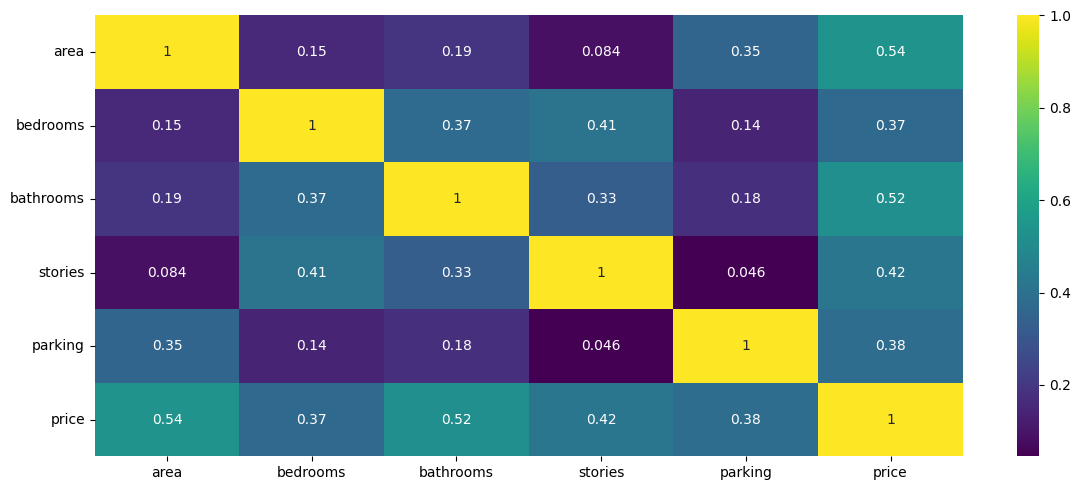

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(temp_df.iloc[:,:6].corr(),cmap='viridis',annot=True,fmt='.2g')
plt.tight_layout()
plt.show()

In [29]:
#since this is a small dataset , we can use linear regression algorithm , later , we will use XGBoost algorithm too ! 


In [30]:
#importing linear regression and xgboostregression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [31]:
lr = LinearRegression()
xg = XGBRegressor()

In [32]:
temp_df

,area,bedrooms,bathrooms,stories,parking,price,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
0,7420,4,2,3,2,13300000,1,0,0,0,1,1,0
1,8960,4,4,4,3,12250000,1,0,0,0,1,0,0
2,9960,3,2,2,2,12250000,1,0,1,0,0,1,1
3,7500,4,2,2,3,12215000,1,0,1,0,1,1,0
4,7420,4,1,2,2,11410000,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1820000,1,0,1,0,0,0,2
541,2400,3,1,1,0,1767150,0,0,0,0,0,0,1
542,3620,2,1,1,0,1750000,1,0,0,0,0,0,2
543,2910,3,1,1,0,1750000,0,0,0,0,0,0,0


In [33]:
#separating x and y for train_test_split
x = temp_df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12]]
y = temp_df["price"]

In [34]:
#using train_test_Split on datasets 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
predicted_data = lr.predict(x_test).round(2)

In [37]:
# lets find out the score okay and also find out overfitting and underfitting! 
print(lr.score(x_train,y_train)),print(lr.score(x_test,y_test))

0.6854429472843789
0.6494754192267804


(None, None)

In [38]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

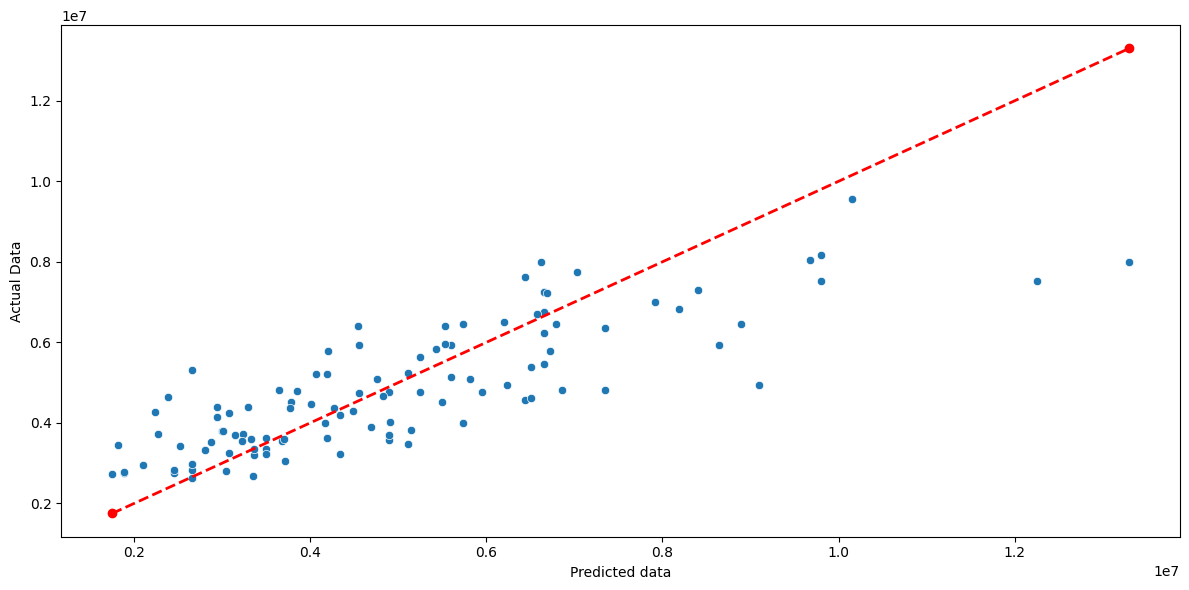

In [39]:
### lets plot the graph 
plt.figure(figsize=(12,6))
sns.scatterplot(x = y_test,y=predicted_data)
plt.xlabel("Predicted data")
plt.ylabel("Actual Data")
# plt.plot(predicte)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],marker="o",color="red",linestyle="dashed",linewidth=2)
plt.tight_layout()
plt.show()

In [40]:
predicted_data,y_test

(array([5203691.71, 7257004.02, 3062828.6 , 4559591.65, 3332932.31,
        3563080.68, 5645466.31, 6413979.67, 2755831.55, 2668938.66,
        9570600.3 , 2827431.51, 3195686.26, 3352263.99, 3713879.5 ,
        5301088.24, 2987920.27, 4810799.82, 4383031.7 , 3525092.19,
        5796259.5 , 5840000.7 , 2760214.61, 4762590.15, 5204755.74,
        7515542.72, 3254681.69, 5236164.46, 8178523.17, 3434166.16,
        6443921.59, 3346004.78, 6742324.74, 4154936.84, 3589152.47,
        5788125.93, 4768370.18, 4391684.04, 3217657.05, 4638196.62,
        4522160.28, 3541284.06, 7238136.12, 4021515.69, 3701978.77,
        4298879.56, 6705004.02, 3993466.52, 3798185.05, 3451821.56,
        7293996.87, 2832905.27, 4378698.15, 4468002.85, 3714623.9 ,
        2718466.9 , 7524449.65, 2950437.15, 4194596.29, 2795827.77,
        4801788.73, 3618230.3 , 5091685.77, 4248122.71, 4729964.2 ,
        4620982.94, 7215846.77, 3485106.19, 5933820.14, 6236580.98,
        4809923.61, 5130920.23, 4527282.87, 8006

In [41]:
# the graph shows that the accuracy is low ! 

In [42]:
#lets check out MSE , MAE and R2-score ! 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
mae = mean_absolute_error(y_test,predicted_data)
mse = mean_squared_error(y_test,predicted_data)
r2error =r2_score(y_test,predicted_data)

In [44]:
mae,mse,r2error

(979679.6911926605, 1771751116014.9807, 0.6494754193413409)

In [45]:
### we'll try with hyperparameter tuning and some other feature selection method later on  lets jump into xgboost ! 


In [46]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [47]:
predicted_data_1 = xg.predict(x_test)

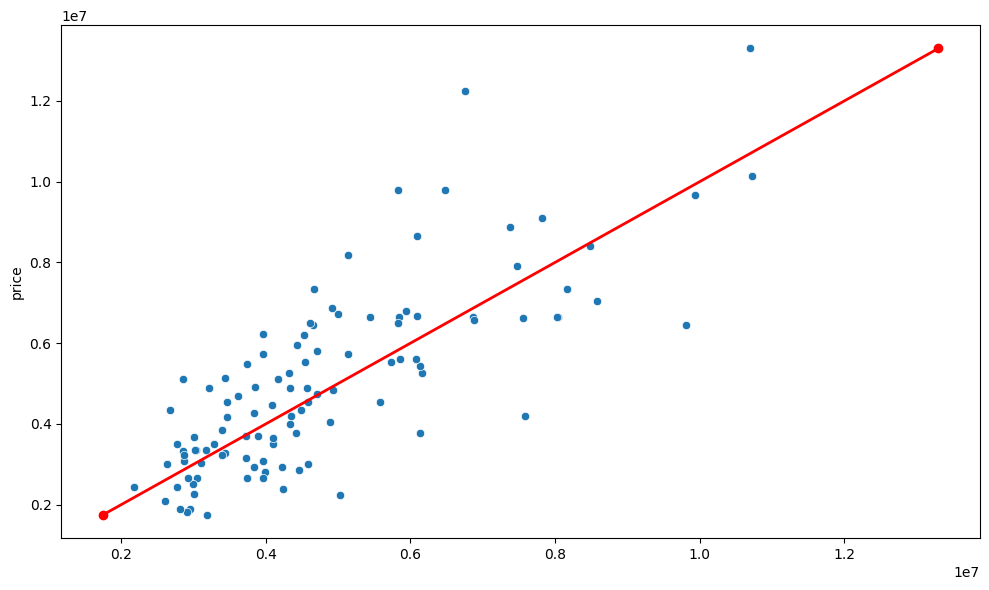

In [48]:
### PLOTTING IN GRAPH 
plt.figure(figsize=(10,6))
sns.scatterplot(x=predicted_data_1,y=y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],marker="o",linewidth='2',color="red")
plt.tight_layout()
plt.show()

In [49]:
### does not look so accurate , let's calculate mse,mae and r2 for this 

In [50]:
mse_1 = mean_squared_error(predicted_data_1,y_test)
mae_1 = mean_absolute_error(predicted_data_1,y_test)
r2error_1 = r2_score(predicted_data_1,y_test)

In [51]:
mse_1,mae_1,r2error_1

(2029771685888.0, 1063770.375, 0.4061310887336731)

In [52]:
nmse_1 = mse_1/(y_test.max()-y_test.min())
nmae_1 = mae_1/(y_test.max()-y_test.min())

In [74]:
nmse_1,nmae_1

(175737.80830199135, 0.09210133116883117)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
randomForestModel = RandomForestRegressor()

In [77]:
randomForestModel.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
randomForestModel.predict(x_test)

array([ 5464305.        ,  7263620.        ,  3775520.        ,
        4479510.        ,  3523800.        ,  3461850.        ,
        5361930.        ,  5168590.        ,  2594410.        ,
        2869100.5       , 10283280.        ,  3320502.5       ,
        3059525.        ,  3443580.        ,  3719100.        ,
        3952690.        ,  3269112.        ,  4835775.        ,
        3721095.        ,  4003230.        ,  5505430.        ,
        5889380.        ,  3132196.66666667,  3875620.        ,
        4618600.        ,  6918660.        ,  3349570.        ,
        4816280.        ,  6619270.        ,  3322550.        ,
        5798205.        ,  3128930.        ,  6978440.        ,
        4184180.        ,  2974160.        ,  6143900.        ,
        4751110.        ,  3670205.        ,  3043565.        ,
        4402650.        ,  4002250.        ,  2790865.        ,
        7445900.        ,  4246970.        ,  4003650.        ,
        4346160.        ,  7114870.     

In [79]:
randomForestModel.score(x_train,y_train),randomForestModel.score(x_test,y_test)

(0.9478984614576328, 0.6136675166047634)

In [80]:
#### woww ,everything seems to be messed up right now, lets twitch some parameters of random forest regressor 

In [81]:
rModel = RandomForestRegressor(n_estimators=300,max_depth=10,max_features=5,bootstrap=True,random_state=42)

In [82]:
rModel.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=5, n_estimators=300,
                      random_state=42)

In [83]:
randomForestPredictedData = rModel.predict(x_test)

In [84]:
rModel.score(x_train,y_train),rModel.score(x_test,y_test)

(0.9353858248882416, 0.6248838992270378)

In [85]:
#### ido not think we can eliminate the difference completely, lets build a graph of latest model, shall we ? 

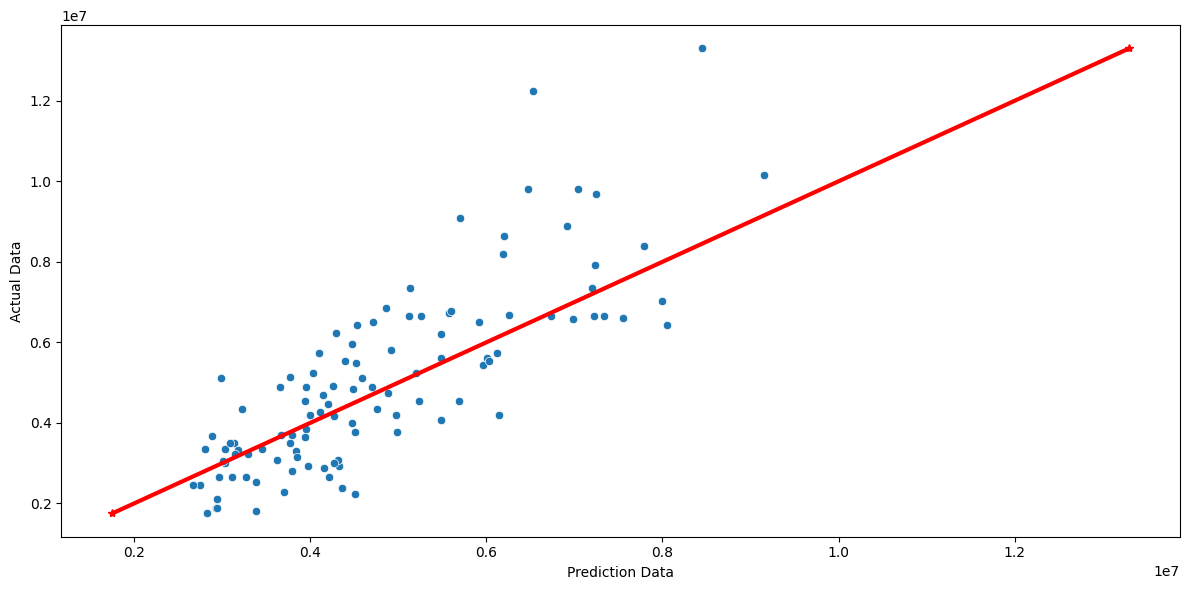

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=randomForestPredictedData,y=y_test)
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],marker="*",linewidth=3,color='red')
plt.tight_layout()
plt.show()

In [87]:
#####  SINCE THERE ARE LOT OF FLAWS HERE , LIKE NOT PROPER EDA AND REMOVAL OF OUTLIERS , I WILL CONTINUE THIS IN NEXT NOTEBOOK. AND TRY TO MAKE THIS MODEL MORE ACCURATE 